In [115]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv(r'https://raw.githubusercontent.com/Sshrut/Data-Science-Intern-2-Mini-Project-Task/master/Task%201%20Data%20set/cleaned_data.csv')
X=dataset['LIMIT_BAL'].values
y=dataset['default payment next month'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.reshape(-1,1),
                                               y.reshape(-1,1),
                                               test_size=0.2,random_state=42)
#X_train

In [117]:
#dataset[['LIMIT_BAL','default payment next month']]

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [118]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [119]:
y_pred=lr.predict(X_test)
y_pred_prob=lr.predict_proba(X_test)
y_pred_prob

array([[0.86916504, 0.13083496],
       [0.94482004, 0.05517996],
       [0.66290891, 0.33709109],
       ...,
       [0.72047081, 0.27952919],
       [0.80536934, 0.19463066],
       [0.87666544, 0.12333456]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [120]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
score= metrics.roc_auc_score(y_test,y_pred_prob[:,1])
score

#accuracy_score(y_test,y_pred)

0.6302043467866831

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

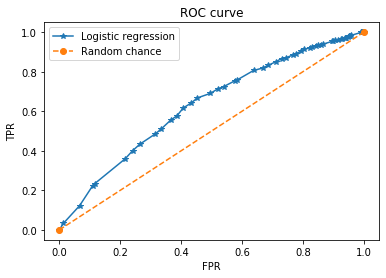

In [121]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'o--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [122]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_test,y_pred_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


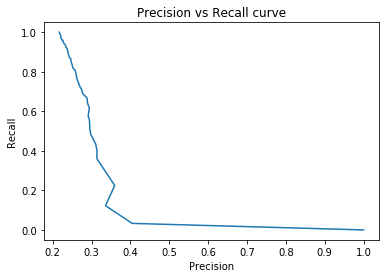

In [123]:
plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title("Precision vs Recall curve")
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [124]:
from sklearn.metrics import auc
auc(recall,precision)

0.31275283839480245

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [125]:
y_prob_train=lr.predict_proba(X_train)
score= metrics.roc_auc_score(y_train,y_prob_train[:,1])
score

0.6158375447898838

    How is this different, conceptually and quantitatively, from your earlier calculation?
